In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('./mnist'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./mnist/sign_mnist_test.csv
./mnist/sign_mnist_train.csv


In [55]:
df_train = pd.read_csv("./mnist/sign_mnist_train.csv")
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [56]:
df_test = pd.read_csv("./mnist/sign_mnist_test.csv")
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [57]:
df_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [58]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [59]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [60]:
pd.DataFrame({
    'X': ['Train Shape','Different number of labels','Different number of labels (Sum)' ],
    'Y': [df_train.shape, df_train.label.unique(), len(df_train.label.unique())],
})

,X,Y
0,Train Shape,"(27455, 785)"
1,Different number of labels,"[3, 6, 2, 13, 16, 8, 22, 18, 10, 20, 17, 19, 2..."
2,Different number of labels (Sum),24


In [62]:
test_df = pd.read_csv("./mnist/sign_mnist_test.csv")
print("Test Shape: ", test_df.shape)
test_df.head()

Test Shape:  (7172, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


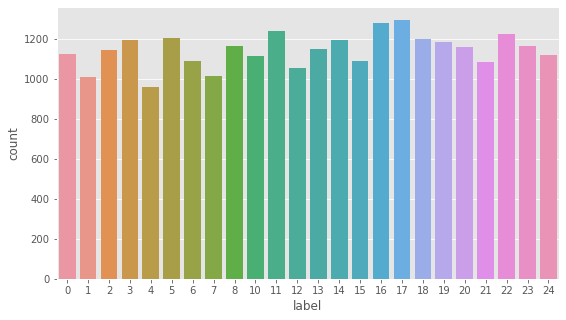

In [8]:
plt.style.use("ggplot")
plt.figure(figsize =(9,5))
sns.countplot(x= df_train['label'],data = df_train)
plt.show()

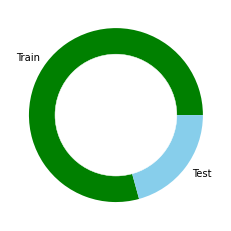

In [64]:
my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie([len(df_train),len(df_test)], labels=["Train","Test"], colors=['green','skyblue'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [65]:
# I synchronize the numbers it represents to a variable in the form of an array
Y_train = df_train['label']
Y_test = df_test['label']

X_train = df_train.drop(["label"],axis=1)
X_test = df_test.drop(["label"],axis=1)

del df_train['label']
del df_test['label']

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
14    1196
3     1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

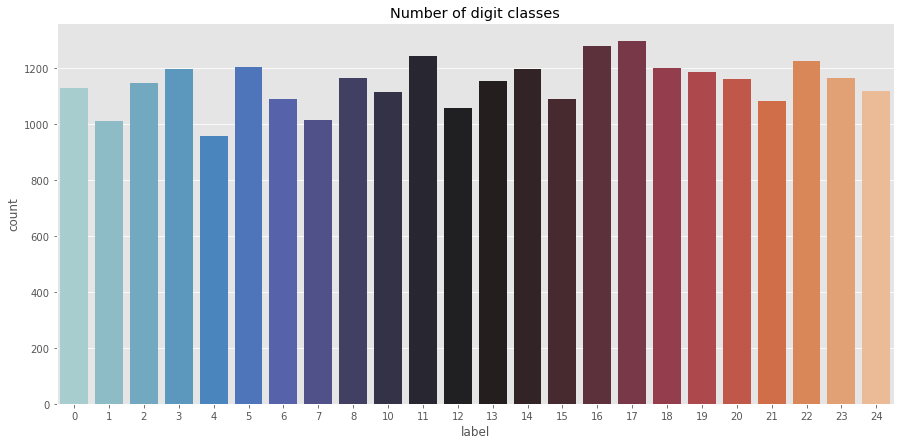

In [66]:
plt.figure(figsize=(15,7))
g = sns.countplot(Y_train, palette="icefire")
plt.title("Number of digit classes")
Y_train.value_counts()

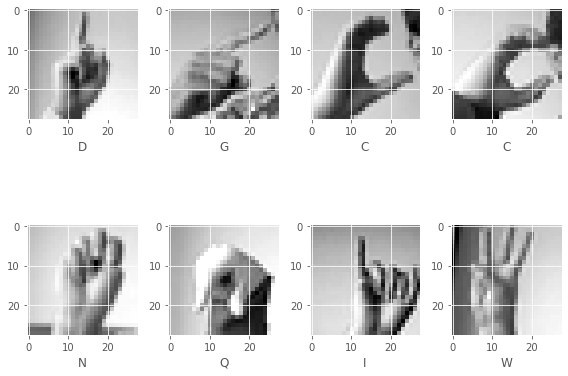

In [67]:
f, ax = plt.subplots(2,4)
f.set_size_inches(8,8)

k = 0
for i in range(2):
    for j in range(4):
        img = X_train.iloc[k].to_numpy()
        img = img.reshape((28,28))
        ax[i,j].set_xlabel(chr(Y_train[k] + 65))
        ax[i,j].imshow(img,cmap='gray')
        k += 1
    plt.tight_layout()

In [68]:
# normalize the data
X_train = X_train/255.0
X_test = X_test/255.0
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (27455, 784)
X_test shape:  (7172, 784)


In [69]:
# reshape
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (27455, 28, 28, 1)
X_test shape:  (7172, 28, 28, 1)


In [70]:
# label encoding
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
Y_train = label_binrizer.fit_transform(Y_train)

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15, random_state=42)

print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (23336, 28, 28, 1)
x_test shape (4119, 28, 28, 1)
y_train shape (23336, 24)
y_test shape (4119, 24)


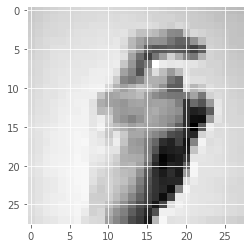

In [72]:
plt.imshow(X_train[10][:,:,0],cmap="gray")
plt.show()

In [73]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(filters=75 , kernel_size=(3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2), strides = 2 , padding = 'same'))

model.add(Conv2D(filters=50, kernel_size=(3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2), strides = 2 , padding = 'same'))

model.add(Conv2D(filters=25, kernel_size=(3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2) , strides = 2 , padding = 'same'))

model.add(Flatten())

model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 75)        750       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 50)        33800     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 25)          11275     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 25)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)              

In [74]:
optimizer = Adam(lr=0.003, beta_1=0.9, beta_2=0.999)

In [75]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [76]:
epochs = 25  # for better result increase the epochs
batch_size = 200

In [77]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=15,  # randomly rotate images in the range 15 degrees
        zoom_range = 0.5, # Randomly zoom image 5%
        width_shift_range=0.15,  # randomly shift images horizontally 15%
        height_shift_range=0.15,  # randomly shift images vertically 15%
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)


In [78]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/25
116/116 [==============================] - 17s 145ms/step - loss: 3.1405 - accuracy: 0.0577 - val_loss: 2.3341 - val_accuracy: 0.2857
Epoch 2/25
116/116 [==============================] - 17s 145ms/step - loss: 2.4980 - accuracy: 0.2173 - val_loss: 1.4247 - val_accuracy: 0.5397
Epoch 3/25
116/116 [==============================] - 17s 145ms/step - loss: 1.9276 - accuracy: 0.3790 - val_loss: 1.0089 - val_accuracy: 0.6570
Epoch 4/25
116/116 [==============================] - 17s 150ms/step - loss: 1.5741 - accuracy: 0.4842 - val_loss: 0.8229 - val_accuracy: 0.7087
Epoch 5/25
116/116 [==============================] - 17s 148ms/step - loss: 1.4126 - accuracy: 0.5275 - val_loss: 0.5360 - val_accuracy: 0.8359
Epoch 6/25
116/116 [==============================] - 17s 148ms/step - loss: 1.2148 - accuracy: 0.5872 - val_loss: 0.4457 - val_accuracy: 0.8614
Epoch 7/25
116/116 [==============================] - 17s 147ms/step - loss: 1.1029 - accuracy: 0.6316 - val_loss: 0.4243 - val_ac

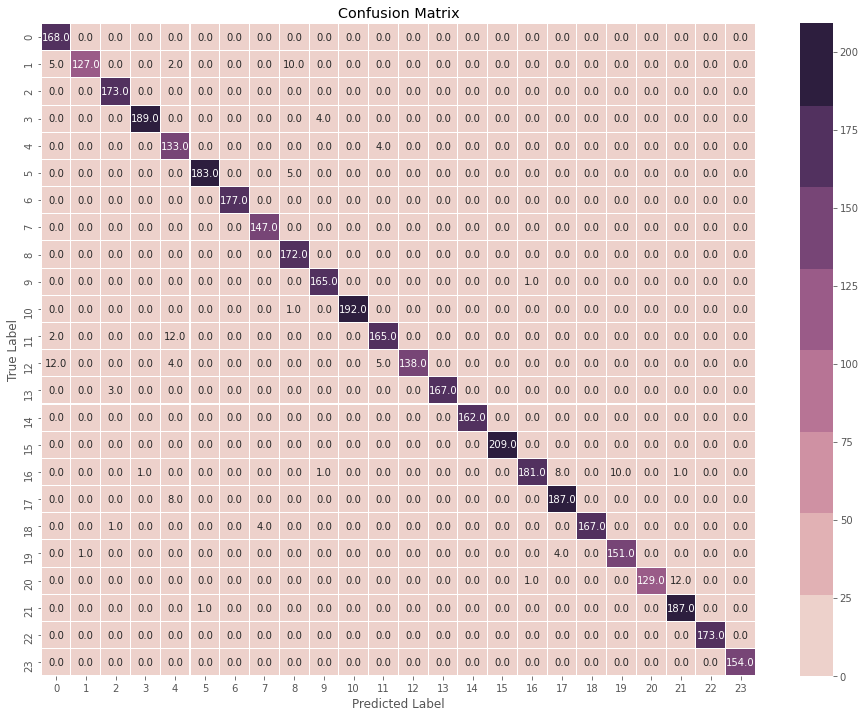

In [79]:
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(16, 12))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap=sns.cubehelix_palette(8),fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [88]:
test = pd.read_csv("./mnist/sign_mnist_test.csv")
y = test['label']
x_test = test.values

x_test = x_test / 255

In [89]:
from sklearn.metrics import classification_report

print(classification_report(Y_true,Y_pred))

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets